In [2121]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2122]:
table = pd.read_table('../drug-discovery/1663769555_8559356_train.txt', names=['binding','sequence'])

In [2123]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
x_sampled, y_sampled = sampler.fit_resample(np.array(table.sequence).reshape(-1,1),table.binding)

In [2124]:
final_data_set = pd.DataFrame(x_sampled, columns  =["sequence"])
final_data_set['binding'] = y_sampled
final_data_set.binding.value_counts()

0    722
1    722
Name: binding, dtype: int64

In [2125]:
from sklearn.model_selection import  train_test_split
training_split, test_split, train_result, test_result = train_test_split(final_data_set.sequence, final_data_set.binding,stratify=final_data_set.binding, train_size=.70, random_state=0)

In [2126]:
test_result.shape

(434,)

In [2127]:
from sklearn.feature_extraction.text import CountVectorizer
def return_binary_vectorized_form(data_frame):
    count_vectorizer = CountVectorizer(binary=True)
    fitted_and_transformed = count_vectorizer.fit_transform(data_frame).toarray()
    return count_vectorizer,  fitted_and_transformed
vectorizer, training_split = return_binary_vectorized_form(training_split)
test_split = vectorizer.transform(test_split).toarray()

In [2128]:
test_result.value_counts()

1    217
0    217
Name: binding, dtype: int64

In [2129]:
train_result = np.array(train_result)
test_result = np.array(test_result)

In [2130]:
# training_sequence= []
# test_sequence = []
# for row in training_split:
#     training_sequence.append(str(row))
# for row in test_split:
#     test_sequence.append(str(row))


In [2148]:
test_result.sum()

217

In [2145]:
test_split
# training_sequence = np.array(training_sequence).reshape(1010)
# # test_sequence = np.array(test_sequence)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [2133]:
# training_sequence.s

In [2134]:
vocab_size = 40000
embedding_dim = 16
max_length = 1000
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [2135]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# tokenizer.fit_on_texts(training_sequence)
# word_index = tokenizer.word_index

In [2136]:
# sequences = tokenizer.texts_to_sequences(training_sequence)
# padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
# test_sequence = tokenizer.texts_to_sequences(test_sequence)
# testing_padded = pad_sequences(test_sequence, maxlen=max_length)
# padded

In [2137]:
training_split.shape[-1]

82172

In [2149]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(training_split.shape[-1],)),
    tf.keras.layers.Dropout(0.85),
    tf.keras.layers.Dense(2,activation='relu'),
    tf.keras.layers.Dropout(0.6),
    # kernel_regularizer=tf.keras.regularizers.L1(.05)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [2150]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'),
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=METRICS)

In [2151]:
num_epochs = 20
history = model.fit(training_split, train_result, epochs=num_epochs, validation_data=(test_split, test_result))

Epoch 1/20


/Users/bhabaranjanpanigrahi/miniforge3/envs/mlp/lib/python3.8/site-packages/keras/backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2022-10-06 01:44:05.318293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - ETA: 0s - loss: 0.6632 - tp: 370.0000 - fp: 262.0000 - tn: 243.0000 - fn: 135.0000 - accuracy: 0.6069 - precision: 0.5854 - recall: 0.7327 - auc: 0.6348 - prc: 0.5894

2022-10-06 01:44:12.548471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 12s 280ms/step - loss: 0.6632 - tp: 370.0000 - fp: 262.0000 - tn: 243.0000 - fn: 135.0000 - accuracy: 0.6069 - precision: 0.5854 - recall: 0.7327 - auc: 0.6348 - prc: 0.5894 - val_loss: 0.6084 - val_tp: 173.0000 - val_fp: 4.0000 - val_tn: 213.0000 - val_fn: 44.0000 - val_accuracy: 0.8894 - val_precision: 0.9774 - val_recall: 0.7972 - val_auc: 0.9749 - val_prc: 0.9689
Epoch 2/20
32/32 [==============================] - 1s 46ms/step - loss: 0.5851 - tp: 404.0000 - fp: 183.0000 - tn: 322.0000 - fn: 101.0000 - accuracy: 0.7188 - precision: 0.6882 - recall: 0.8000 - auc: 0.7652 - prc: 0.6876 - val_loss: 0.4706 - val_tp: 188.0000 - val_fp: 1.0000 - val_tn: 216.0000 - val_fn: 29.0000 - val_accuracy: 0.9309 - val_precision: 0.9947 - val_recall: 0.8664 - val_auc: 0.9954 - val_prc: 0.9926
Epoch 3/20
32/32 [==============================] - 1s 35ms/step - loss: 0.5173 - tp: 450.0000 - fp: 189.0000 - tn: 316.0000 - fn: 55.0000 - accuracy: 0.7584 - precision

In [2109]:
table_test = pd.read_table('../drug-discovery/1663769555_8653905_test.txt', names=['sequence'])

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,

In [2111]:
unlabeled_test_sequence = vectorizer.transform(table_test.sequence).toarray()

In [2112]:
unlabeled_test_sequence.shape

(350, 82145)

In [2113]:
y = model.predict(unlabeled_test_sequence)

 1/11 [=>............................] - ETA: 1s

2022-10-06 01:30:19.373410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 20ms/step


In [2143]:
y

array([[1.75521746e-01],
       [5.54977590e-03],
       [1.79217290e-02],
       [1.78968608e-02],
       [1.57925133e-02],
       [1.02927648e-02],
       [1.60034467e-02],
       [2.31880136e-02],
       [2.30996385e-02],
       [3.66349593e-02],
       [1.28836799e-02],
       [1.15241809e-02],
       [6.29432034e-04],
       [1.04653388e-02],
       [1.17007494e-02],
       [1.10611869e-02],
       [2.92280596e-03],
       [8.62275483e-04],
       [1.36420969e-02],
       [4.29580174e-03],
       [3.61924153e-03],
       [1.37779489e-02],
       [7.46713078e-04],
       [1.49882650e-02],
       [5.97570324e-03],
       [1.89996541e-01],
       [7.43256509e-02],
       [1.09598879e-02],
       [2.08329577e-02],
       [7.29883835e-03],
       [1.59714520e-02],
       [1.15250694e-02],
       [1.40340375e-02],
       [1.58128736e-03],
       [1.24751180e-02],
       [1.74183119e-02],
       [1.76055897e-02],
       [3.83425206e-02],
       [4.57743220e-02],
       [2.34245174e-02],


In [2115]:
# for i in range(3):
z = [1 if i>=.5 else 0 for i in y ]

In [2144]:
z[61]

0

In [2119]:
import csv
outfile = open('./results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], z))
outfile.close()

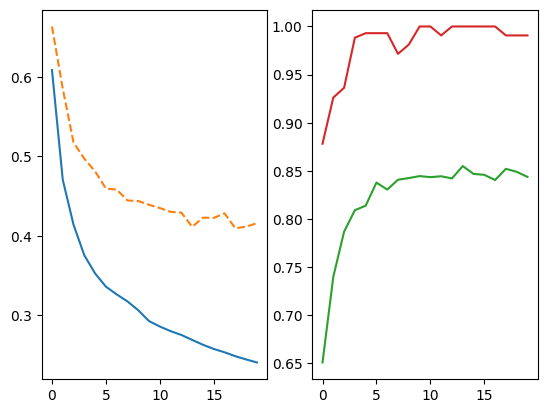

In [2152]:
fig, (ax1,ax2) = plt.subplots(1,2)
testloss = np.array(history.history['val_loss']).reshape(len(history.history['val_loss']),1)
trainloss = np.array(history.history['loss']).reshape(len(history.history['loss']),1)

ax1.plot(history.epoch, testloss, '-')
ax1.plot(history.epoch, trainloss, '--')
# ax1.ylabel('loss')
# ax1.xlabel('epoch')

train_precision = np.array(history.history['precision']).reshape(len(history.history['loss']),1)
train_recall= np.array(history.history['recall']).reshape(len(history.history['loss']),1)
j =( 2 * train_precision * train_recall) / (train_precision+train_recall)

test_precission = np.array(history.history['val_precision']).reshape(len(history.history['loss']),1)
test_recall = np.array(history.history['val_recall']).reshape(len(history.history['loss']),1)
k = (2 * test_precission * test_recall )/ (test_precission+test_recall)
# plt.plot(history.epoch,j, '-')
# plt.plot(k,'--')

ax2.plot(history.epoch, k, 'tab:red')
ax2.plot(history.epoch, j, 'tab:green')

# ax3.plot(j+3)
# ax3.plot(trainloss,'tab:blue')